In [29]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util

In [30]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [31]:
model = MultiPoleModel(moments=3, lrate=0.0009, optimizer='rmsprop', loss='mse', scale=1e9, early_stop=False, target_stop=4)
test_epochs = 2000

In [32]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 38613.566
epoch  1 --- Loss --- 37185.934
epoch  2 --- Loss --- 35850.99
epoch  3 --- Loss --- 34554.277
epoch  4 --- Loss --- 33301.51
epoch  5 --- Loss --- 32092.107
epoch  6 --- Loss --- 30925.443
epoch  7 --- Loss --- 29801.098
epoch  8 --- Loss --- 28718.666
epoch  9 --- Loss --- 27677.748
epoch  10 --- Loss --- 26677.936
epoch  11 --- Loss --- 25718.82
epoch  12 --- Loss --- 24799.965
epoch  13 --- Loss --- 23920.932
epoch  14 --- Loss --- 23081.285
epoch  15 --- Loss --- 22280.56
epoch  16 --- Loss --- 21518.285
epoch  17 --- Loss --- 20793.975
epoch  18 --- Loss --- 20107.105
epoch  19 --- Loss --- 19457.145
epoch  20 --- Loss --- 18843.494
epoch  21 --- Loss --- 18265.54
epoch  22 --- Loss --- 17722.58
epoch  23 --- Loss --- 17213.871
epoch  24 --- Loss --- 16738.6
epoch  25 --- Loss --- 16295.864
epoch  26 --- Loss --- 15884.694
epoch  27 --- Loss --- 15504.054
epoch  28 --- Loss --- 15152.817
epoch  29 --- Loss --- 14829.796
epoch  30 --- Loss --- 14533

In [33]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 94.26006991068522 minutes


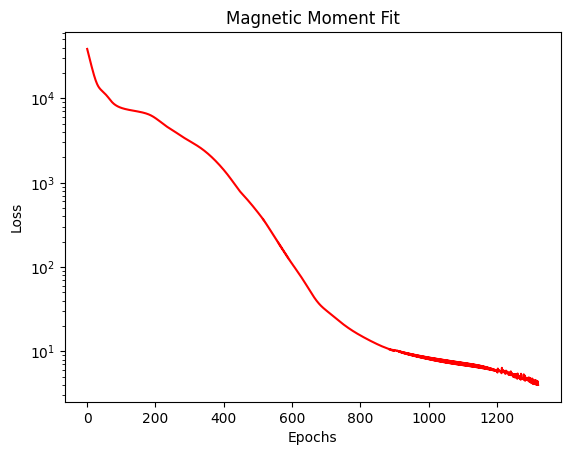

In [34]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [35]:
model.moment()

---- Moment  0 -----
Position:  [[ 5.0120074e-01  3.8170729e-05 -3.0479783e-03]]
Value:     [[ 0.9798841  -0.00531595  0.00710113]]
---- Moment  1 -----
Position:  [[ 0.00163521 -0.01806975  0.16641521]]
Value:     [[-0.02066618  0.0319851   2.7147276 ]]
---- Moment  2 -----
Position:  [[-0.00453866  0.2557201  -0.01771931]]
Value:     [[0.04542123 1.9348195  0.29403412]]
